### Name     : Sandip Mahesh Randive
### Email Id : sandiprandive75@gmail.com
### Data Science Internship Task
### Social Ad Campaigns Dataset

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df = pd.read_csv("D:\\Internshala\\Stirring mind\\KAG_conversion_data.csv")

## Data Preprocessing

In [4]:
#look at dataset
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
#chech data shape
df.shape

(1143, 11)

In [6]:
#checking for null values
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [9]:
#unique values present in each column
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [10]:
categorical_features = [i for i in df.columns if df[i].dtypes == 'object']
categorical_features

['age', 'gender']

In [11]:
for i in categorical_features:
    print(df[i].unique())

['30-34' '35-39' '40-44' '45-49']
['M' 'F']


## Exploratory Data Analysis

In [12]:
print('Total ADS: {}'.format(df.shape[0]))

print('Number of ADS with 0 clicks: {}'.format(len(df.loc[df['Clicks'] == 0])))
print('Number of 0 paids to FACEBOOK for showing ADS: {}'.format(len(df.loc[df['Spent'] == 0])))
print('Number of ADS with 0 enquires about their product: {}'.format(len(df.loc[df['Total_Conversion'] == 0])))
print('Number of ADS with 0 buys: {}'.format(len(df.loc[df['Approved_Conversion'] == 0])))

Total ADS: 1143
Number of ADS with 0 clicks: 207
Number of 0 paids to FACEBOOK for showing ADS: 207
Number of ADS with 0 enquires about their product: 8
Number of ADS with 0 buys: 559


### Relation with the Successfully Approved Conversion

In [13]:
age_group = df[['age', 'Approved_Conversion', 'Clicks', 'Spent', 'Total_Conversion']].groupby(['age']).mean()
age_group

,Approved_Conversion,Clicks,Spent,Total_Conversion
age,,,,
30-34,1.159624,22.260563,35.803756,3.359155
35-39,0.834677,28.604839,44.808185,2.524194
40-44,0.809524,36.838095,55.189190,2.490476
45-49,0.803089,53.482625,80.118417,2.640927


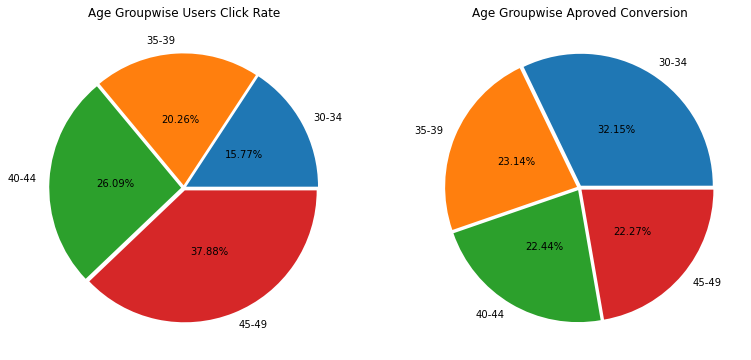

In [14]:
#Successfully Approved conversation according to age groups
plt.figure(figsize = (13, 10))
plt.subplot(121)
plt.pie(age_group.Clicks, labels = age_group.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*4)
plt.title('Age Groupwise Users Click Rate')

plt.subplot(122)
plt.pie(age_group.Approved_Conversion,labels = age_group.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*4)
plt.title('Age Groupwise Aproved Conversion')

plt.show()

#### ==> Most of the Approved conversaation is lies in a age group between 30-34.
1. Age group 30-34 has a less click rate but higher conversion rate.
2. Age group 45-49 has a higher click rate but less conversion rate

<Figure size 720x576 with 0 Axes>

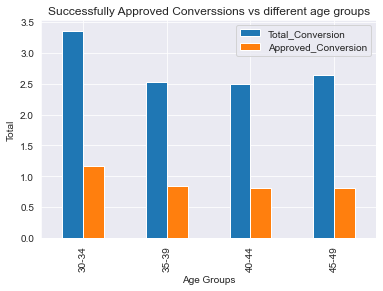

In [15]:
#check clicks vs Successfully Approved Conversion
sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
df.groupby('age')['Total_Conversion', 'Approved_Conversion'].mean().plot.bar()
plt.title('Successfully Approved Converssions vs different age groups')
plt.xlabel('Age Groups')
plt.ylabel('Total')
plt.show()

#### ==> From the above figure, 50 % of the users from total conversion is successfully convert into the Approved Conversssions. Most of the users are present in the 30-34 age group.

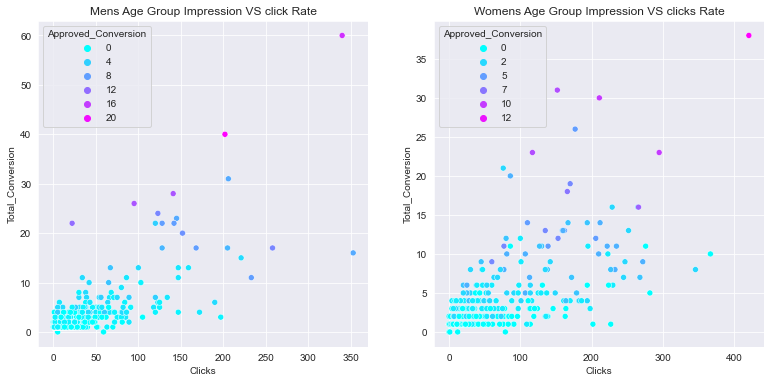

In [16]:
#male/female total converssion VS clicks
plt.figure(figsize = (13, 6))
plt.subplot(121)
sns.scatterplot(x = 'Clicks', y = 'Total_Conversion', hue = 'Approved_Conversion', palette = 'cool', data = df[df['gender'] == 'M'])
plt.title('Mens Age Group Impression VS click Rate')

plt.subplot(122)
sns.scatterplot(x = 'Clicks', y = 'Total_Conversion', hue = 'Approved_Conversion', palette = 'cool', data = df[df['gender'] == 'F'])
plt.title('Womens Age Group Impression VS clicks Rate')
plt.show()

#### ==> Females has more clicks rate.

<Figure size 720x576 with 0 Axes>

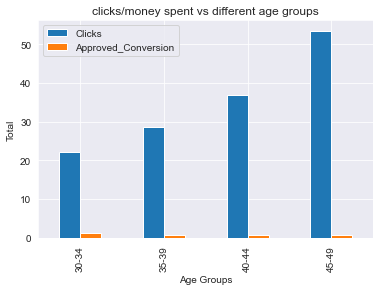

In [17]:
#check clicks vs total Conversion
sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
df.groupby('age')['Clicks','Approved_Conversion'].mean().plot.bar()
plt.title('clicks/money spent vs different age groups')
plt.xlabel('Age Groups')
plt.ylabel('Total')
plt.show()

#### ==> Above figure shows the relation between click rate of user VS change in successful buyer customer. After analysis figure, In age group 30-34, click rate is less than 45-49 age group but the successfully approved conversion is good.

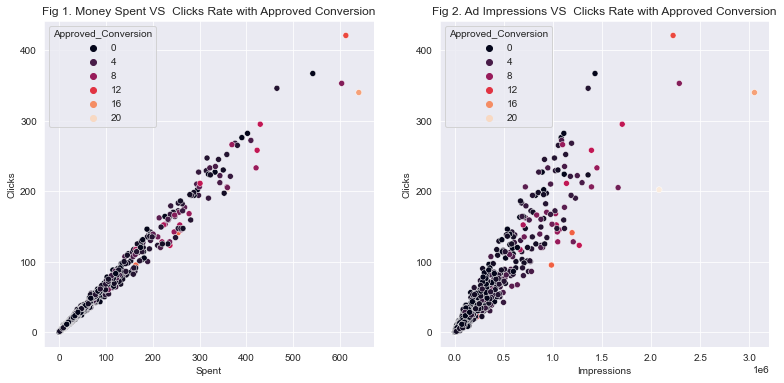

In [18]:
#relation between clicks rate and money spend, number of ad impression with approved converssion
plt.figure(figsize = (13, 6))
plt.subplot(121)
sns.scatterplot(x = 'Spent', y = 'Clicks', hue = 'Approved_Conversion', palette = 'rocket', data = df)
plt.title('Fig 1. Money Spent VS  Clicks Rate with Approved Conversion')

plt.subplot(122)
sns.scatterplot(x = 'Impressions', y = 'Clicks', hue = 'Approved_Conversion', palette = 'rocket',data = df)
plt.title('Fig 2. Ad Impressions VS  Clicks Rate with Approved Conversion')

plt.show()

#### ==> By analysing Fig 1. & Fig 2., As the money spend on ad and increassing ad impression on user multiple times, click rate is also increasing. Also it is conclude that successfully approved products contains higher click rate.

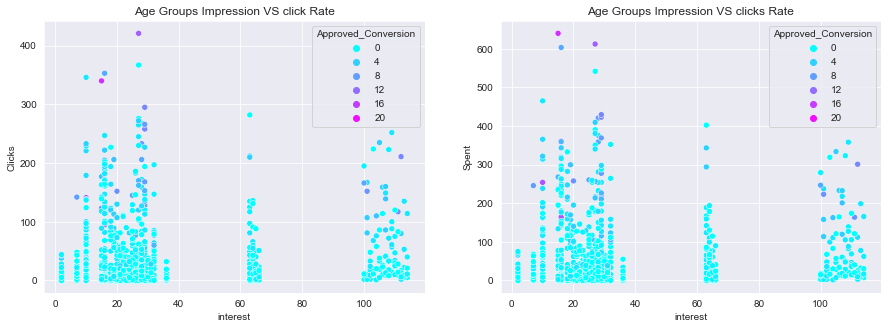

In [19]:
#relation with interest of person 
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.scatterplot(x = 'interest', y = 'Clicks', hue = 'Approved_Conversion', palette = 'cool', data = df)
plt.title('Age Groups Impression VS click Rate')

plt.subplot(122)
sns.scatterplot(x = 'interest', y = 'Spent', hue = 'Approved_Conversion', palette = 'cool',data = df)
plt.title('Age Groups Impression VS clicks Rate')
plt.show()

### Relation with users click rate

<Figure size 720x576 with 0 Axes>

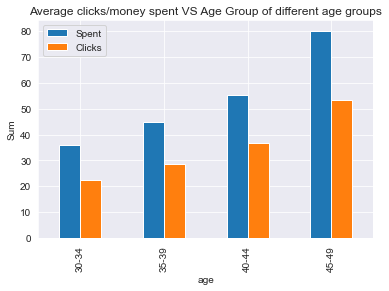

In [20]:
#spend vs click rate relation
sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))
df.groupby('age')['Spent','Clicks'].mean().plot.bar()
plt.title('Average clicks/money spent VS Age Group of different age groups')
plt.ylabel('Sum')
plt.show()

### ==> As the spending on ads increases, users click rate is also increasing.

### Ad campaigns Analysis

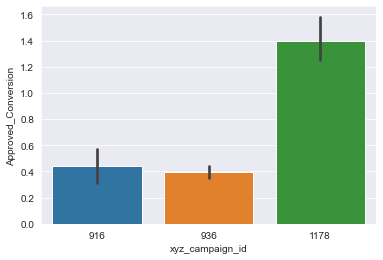

In [21]:
#total conversion count for each ad campaign

sns.barplot(df['xyz_campaign_id'].astype(str), y = 'Approved_Conversion', data = df)
plt.show()

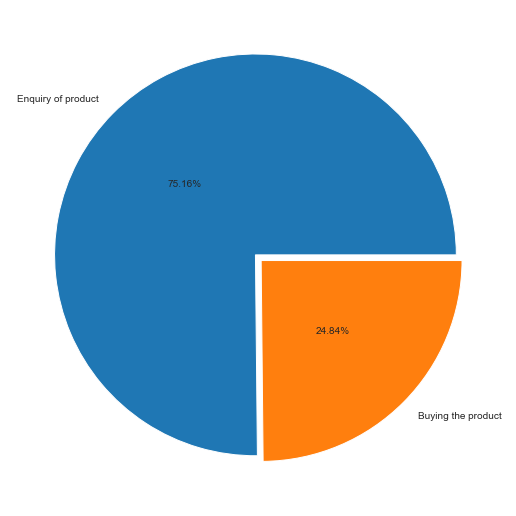

In [22]:
fig= plt.figure(figsize=(9,10))

value=[df['Total_Conversion'].mean(), df['Approved_Conversion'].mean()]
labels= ['Enquiry of product', 'Buying the product']
plt.pie(value,labels = labels, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*2)

plt.show()

### Genderwise distribution 

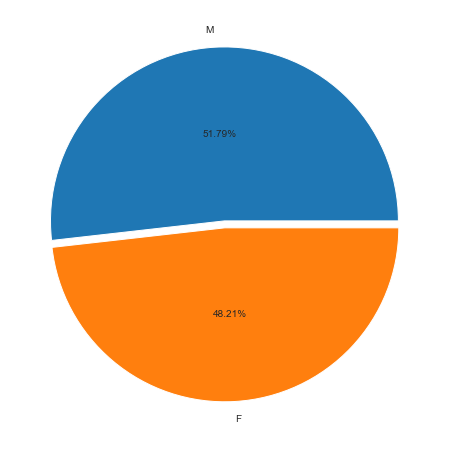

In [25]:
gender_count = df.gender.value_counts()
fig= plt.figure(figsize=(10,8))
plt.pie(gender_count, labels = gender_count.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*2)
plt.show()

In [26]:
gender_group = df[['gender', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']].groupby(['gender']).mean()
gender_group

,Clicks,Spent,Total_Conversion,Approved_Conversion
gender,,,,
F,43.335753,62.618185,2.983666,0.898367
M,24.133446,40.882787,2.736486,0.986486


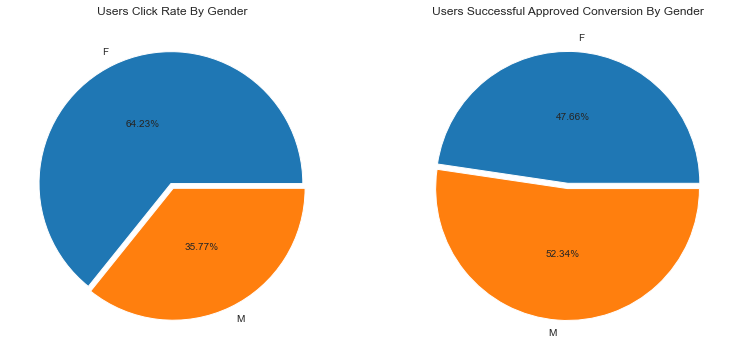

In [27]:
fig= plt.figure(figsize=(13,10))

plt.subplot(121)
plt.pie(gender_group.Clicks, labels = gender_group.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*2)
plt.title('Users Click Rate By Gender')

plt.subplot(122)
plt.pie(gender_group.Approved_Conversion, labels = gender_group.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*2)
plt.title('Users Successful Approved Conversion By Gender')
plt.show()

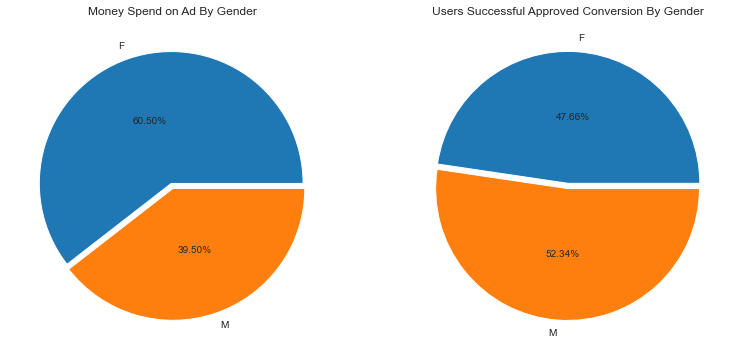

In [28]:
fig= plt.figure(figsize=(13,10))

plt.subplot(121)
plt.pie(gender_group.Spent, labels = gender_group.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*2)
plt.title('Money Spend on Ad By Gender')

plt.subplot(122)
plt.pie(gender_group.Approved_Conversion, labels = gender_group.index, autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*2)
plt.title('Users Successful Approved Conversion By Gender')
plt.show()

### ==> After refering above pie charts, Click rate is higher in female but the product buy is lesser as compare to mens. Also money spent on ad for female is higher but approved conversion rate is less.

<AxesSubplot:>

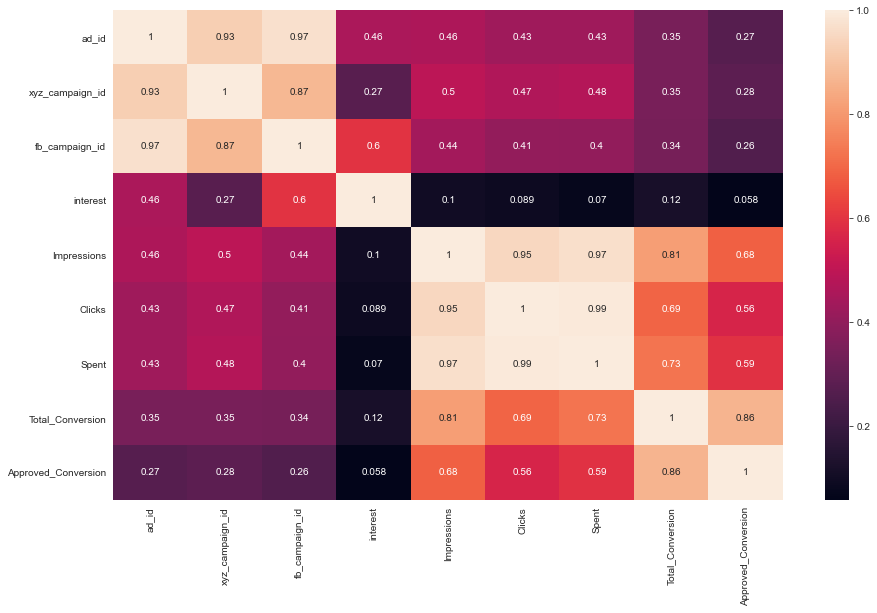

In [29]:
#checking correlation between all the features
plt.figure(figsize = (15, 9))
corr = df.corr()
sns.heatmap(corr, data = df, annot = True, linecolor = 'white')

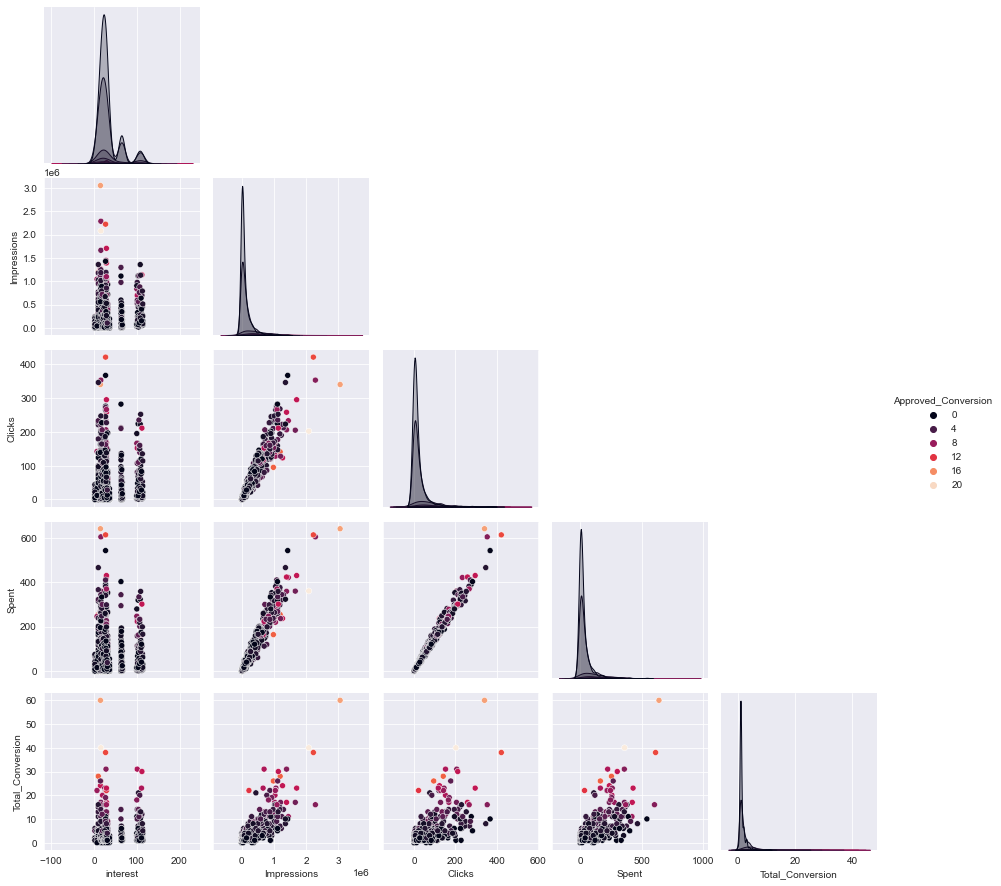

In [30]:
#pairplot to watch disribution between features
sns.pairplot(data=df[['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion','Approved_Conversion']], 
             hue = 'Approved_Conversion', palette = 'rocket', corner = True)
plt.show()

#### ==> Above heatmap shows corralation between numeric variables. Among them, Impressions, Clicks, Spent, Total_Conversion showing a good correlation with approved conversion.

In [31]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

# ** Cluster Analysis **

In [32]:
#selecting importtant features for clustering
data = df[['gender', 'age', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']]

### Categorical Features Conversion

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()
data['age'] = encoder.fit_transform(data['age'])
data['gender']= encoder.fit_transform(data['gender'])

In [35]:
data.sample(10)

,gender,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
757,1,3,464036,77,123.550000,3,1
696,1,1,28989,2,2.290000,1,0
14,1,0,14669,7,10.280000,1,1
347,0,0,8469,2,3.090000,1,0
742,1,2,400844,85,140.970002,4,2
725,1,2,110018,24,39.860000,1,0
26,1,1,7440,2,2.980000,1,1
516,0,2,415,0,0.000000,1,0
841,0,0,565565,113,169.669998,7,4
874,0,0,48935,7,9.970000,1,1


In [36]:
data.shape

(1143, 7)

In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2 = scaler.fit_transform(data)

In [38]:
data2

array([[ 0.96475035, -1.07113704, -0.57379269, ..., -0.57477185,
        -0.19092221,  0.03223643],
       [ 0.96475035, -1.07113704, -0.54017097, ..., -0.57028241,
        -0.19092221, -0.54348614],
       [ 0.96475035, -1.07113704, -0.59508655, ..., -0.59123316,
        -0.41405523, -0.54348614],
       ...,
       [-1.03653758,  1.47068228, -0.11259846, ..., -0.12743878,
        -0.19092221, -0.54348614],
       [-1.03653758,  1.47068228,  1.9304925 , ...,  1.69619753,
         1.14787588,  0.60795901],
       [-1.03653758,  1.47068228,  1.04415359, ...,  1.31517011,
         0.47847683,  0.60795901]])

## K-Means Clustering For Users Segmentation

In [39]:
from sklearn.cluster import KMeans

### Elbow method to find optimum number of Cluster

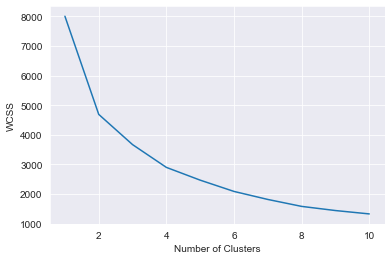

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

No of Clusters selected ==> 4

In [41]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5)
kmeans.fit(data2)

KMeans(n_clusters=4, random_state=5)

In [42]:
#predict clusters
clusters = kmeans.predict(data2)

In [43]:
#clusters centers
ctn = kmeans.cluster_centers_
print(ctn)

[[ 0.29765437 -0.38076636  3.51404759  2.75784755  3.00664699  4.80891018
   4.85124764]
 [-1.03653758 -0.01582813 -0.35474033 -0.31157185 -0.32839265 -0.27758548
  -0.25690995]
 [-0.54021818  0.44039818  1.79970688  2.01411539  1.95364128  1.00328569
   0.66322838]
 [ 0.96475035 -0.06938873 -0.29635171 -0.34372398 -0.32829599 -0.24105523
  -0.18193661]]


In [44]:
labels = pd.DataFrame((clusters), columns=['Clusters'])
labels.head()

,Clusters
0,3
1,3
2,3
3,3
4,3


In [45]:
labels.value_counts()

Clusters
3           543
1           448
2           125
0            27
dtype: int64

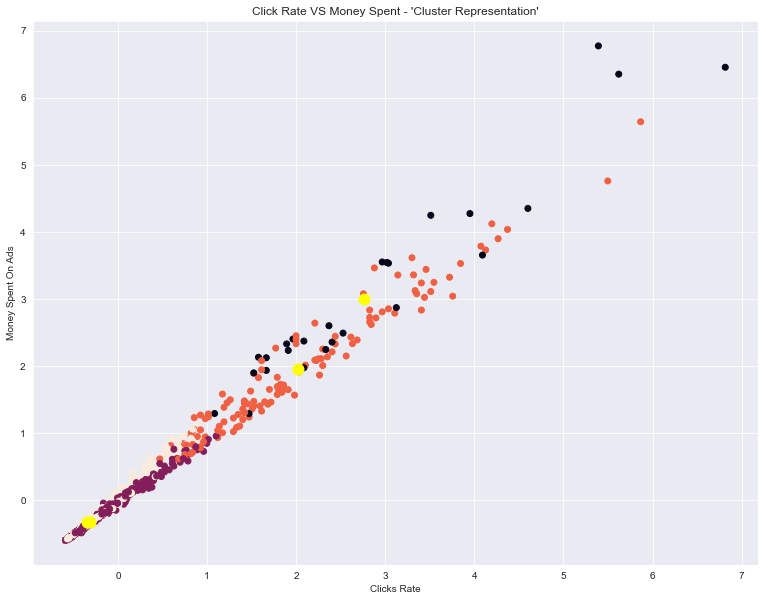

In [46]:
plt.figure(figsize = (13, 10))
plt.scatter(data2[:, 3], data2[:, 4], c = clusters)
plt.scatter(ctn[:, 3], ctn[:, 4], marker = 'o', color = 'yellow', s = 120)
plt.title('Click Rate VS Money Spent - \'Cluster Representation\'')
plt.xlabel('Clicks Rate')
plt.ylabel('Money Spent On Ads')
plt.show()

In [47]:
cluster_data  = pd.concat((df, labels), axis = 1)

In [48]:
cluster_data['Clusters'] = cluster_data['Clusters'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'})

In [49]:
cluster_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Clusters
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,Cluster 4
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,Cluster 4
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,Cluster 4
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,Cluster 4
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,Cluster 4


<Figure size 936x720 with 0 Axes>

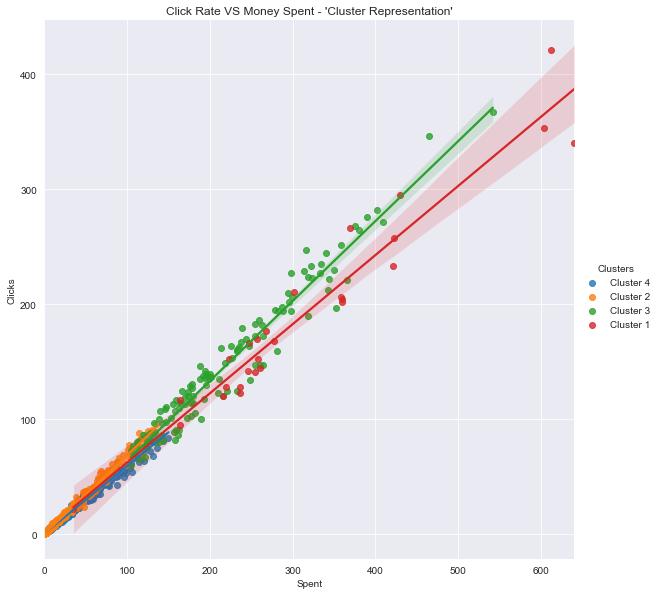

In [58]:
plt.figure(figsize = (13, 10))
sns.lmplot(data = cluster_data, x = 'Spent', y = 'Clicks', hue = 'Clusters', fit_reg = True, size = 8)
plt.title('Click Rate VS Money Spent - \'Cluster Representation\'')
plt.show()

In [53]:
cluster_group = cluster_data[['Impressions','Clicks','Spent','Total_Conversion', 'Approved_Conversion', 'Clusters']].groupby(['Clusters']).mean()
cluster_group

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
Clusters,,,,,
Cluster 1,1.285312e+06,190.222222,312.549259,24.407407,9.370370
Cluster 2,7.583132e+04,15.671875,22.833058,1.611607,0.497768
Cluster 3,7.493661e+05,147.928000,221.074240,7.352000,2.096000
Cluster 4,9.408508e+04,13.843462,22.841455,1.775322,0.627993


### ==> Cluster 1 is Showing a very nice results.

### ==> Above fig shows that cluster 1 and cluster 3 showing as good clusters, because the as the money spend on ad, users clicks rate is also improving. 

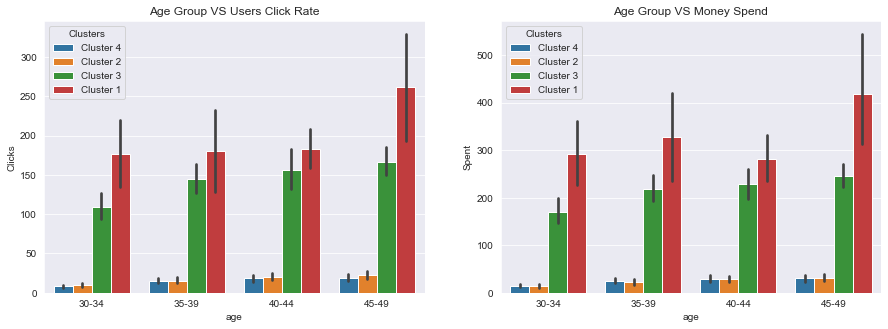

In [54]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.barplot(x = cluster_data.age.astype('str'), y = cluster_data.Clicks, hue = cluster_data.Clusters)
plt.title('Age Group VS Users Click Rate')

plt.subplot(122)
sns.barplot(x = cluster_data.age.astype('str'), y = cluster_data.Spent, hue = cluster_data.Clusters)
plt.title('Age Group VS Money Spend')


plt.show()

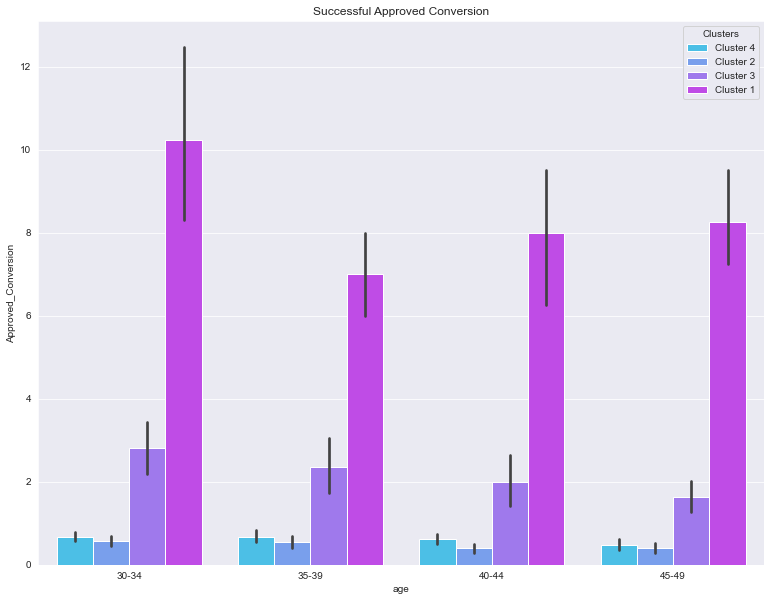

In [55]:
plt.figure(figsize = (13, 10))
sns.barplot(x = cluster_data.age.astype('str'), y = cluster_data.Approved_Conversion, 
            hue = cluster_data.Clusters, palette = 'cool')
plt.title('Successful Approved Conversion' )
plt.show()

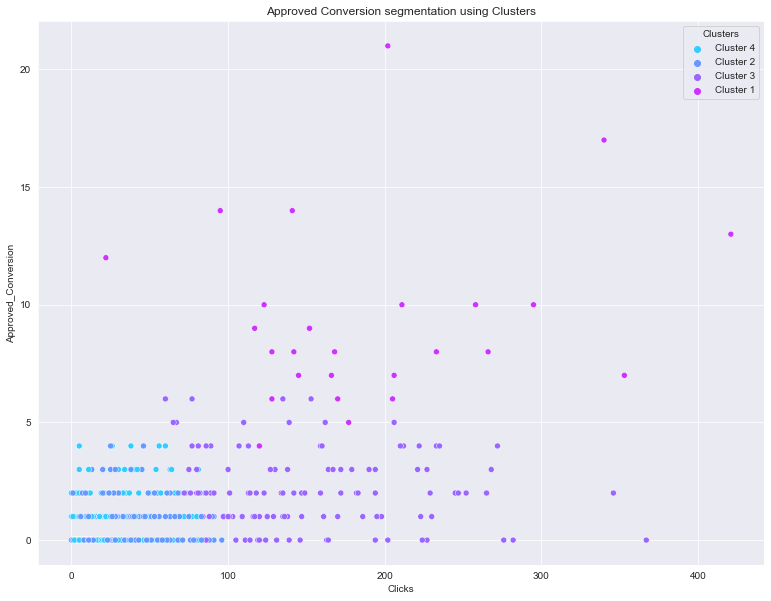

In [56]:
plt.figure(figsize = (13, 10))
sns.scatterplot(x = cluster_data.Clicks, y = cluster_data.Approved_Conversion, hue = cluster_data.Clusters, palette = 'cool')
plt.title('Approved Conversion segmentation using Clusters')
plt.show()

## ==> Conclusion
After studying above figures, it is showing that cluster 1 is showing a good cluster.

### Age Group
People in age group 30-34 buys more product because it seems like they have higher tendency to buy product after clicking the ad while in age group 45 to 49 people clicks more on ad but have a lower 'Approved_conversion' rate comparitively.

Both the genders shows similar interests in all three campaigns.

### Interest:

There is rise in 'Approved Conversion' between 0-40 'interest' but there is a fall in 'Approved Conversion' after 40.

### Spent
As the amount of money spent increases, no of product bought increases.
There is a sudden rise in the Approved_Conversion after a certain point in Impressions.
Product bought after clicking the ad:

It seems women tends to click more than women but men buy more products than women after clicking the add.
People in age group 30-34 has more tendency to buy product after clicking the add.

Click rate is higher in female but the product buy is lesser as compare to mens. Also money spent on ad for female is higher but approved conversion rate is less.

### Business Questions 
1)How to optimize the social ad campaigns for the highest conversion rate possible.

=> Since highest conversion rate was attained in campaign_c, we can consider the factors contributed in this campaign:
=> The number of ad counts should be more for better reach.
=> The age group of 30-34 should be the main aim.
=> More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.

2)Finding the perfect target demographics with the appropriate clickthrough rates

=> Mens tend to buy the product more often after clicking the ad than women.
=> Also the age group 30 to 34 buy the product more often after clicking the ads.
=> Cluster 1 shows good users segmentation.

In [57]:
## Thank You!